In [1]:
from sympy import *
from itertools import *
import LieSympy as lp
import numpy as np
import copy as copy
init_printing()

In [2]:
g = lp.groupAction([['x'],['u','P']],['a','b','psi'],3)

In [3]:
X_expr = lp.cos(lp.psi)*lp.x-sin(lp.psi)*lp.u+lp.a
U_expr =  sin(lp.psi)*lp.x+cos(lp.psi)*lp.u+lp.b
P_expr = lp.P+lp.psi

g.Def_transformation([X_expr, U_expr, P_expr],[0,0,0],[[0,0,0],[lp.x,lp.u,lp.P]])

### Test the invariantization( ) method
This is a minimally viable method right now.  Later work will improve the method to allow for invariantization in terms ofnormalized invariants and curvature invariants.

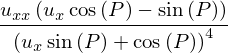

In [5]:
g.invariantization(lp.ux*lp.uxx+lp.u*lp.uxx+lp.x*lp.P+lp.P)

### Test rec_relations( ) method

In [4]:
g.mc_invariants